## TensorFlow 2.0 설치
[런타임] -> [런타임 유형변경]에서 하드웨어 가속기를 꼭 GPU로 설정!

In [1]:
!pip install tensorflow-gpu==2.0.0

In [2]:
## Importing Libraries
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.utils import to_categorical
import numpy as np
import matplotlib.pyplot as plt
import os

print(tf.__version__)
print(keras.__version__)

2.0.0
2.2.4-tf


# Simple CNN for Cifar10 Dataset

In [0]:
## Hyper Parameters
learning_rate = 0.001
training_epochs = 20
batch_size = 100
n_class = 10

In [0]:
## Data 준비

## MNIST Dataset #########################################################
#mnist = keras.datasets.mnist
#class_names = ['0', '1', '2', '3', '4', '5', '6', '7', '8', '9']
##########################################################################

## Fashion MNIST Dataset #################################################
#mnist = keras.datasets.fashion_mnist
#class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']
##########################################################################

## Cifar10 Dataset #########################################################
cifar = keras.datasets.cifar10
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']
############################################################################

In [0]:
## Dataset 만들기
(train_images, train_labels), (test_images, test_labels) = cifar.load_data()    
    
train_images = train_images.astype(np.float32) / 255.
test_images = test_images.astype(np.float32) / 255.
#train_images = np.expand_dims(train_images, axis=-1)
#test_images = np.expand_dims(test_images, axis=-1)
print(train_images.shape)
print(test_images.shape)
n_train = train_images.shape[0]
n_test = test_images.shape[0]
    
train_labels = to_categorical(train_labels, 10)
test_labels = to_categorical(test_labels, 10)    

(50000, 32, 32, 3)
(10000, 32, 32, 3)


In [0]:
train_dataset = tf.data.Dataset.from_tensor_slices((train_images, train_labels)).shuffle(
                buffer_size=100000).batch(batch_size).repeat()
test_dataset = tf.data.Dataset.from_tensor_slices((test_images, test_labels)).batch(batch_size).repeat()

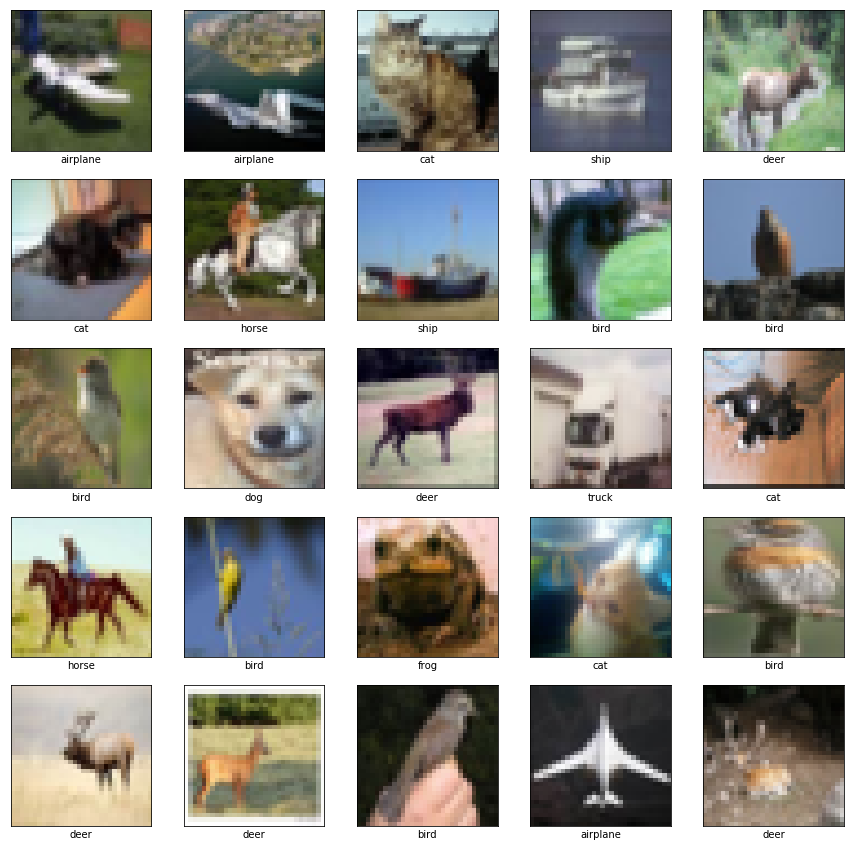

In [0]:
## Data 확인
plt.figure(figsize=(15,15))
for i in range(25):
    img_idx = np.random.randint(0, 49999)
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[img_idx])
    plt.xlabel(class_names[np.argmax(train_labels[img_idx])])

In [0]:
## Model 만들기
from tensorflow.keras.layers import Conv2D, MaxPool2D, GlobalAveragePooling2D, Dense, Concatenate

def create_model():
    model = keras.Sequential()
    model.add(keras.layers.Conv2D(filters=32, kernel_size=3, activation='relu', padding='SAME', 
                                  input_shape=(32, 32, 3)))
    model.add(keras.layers.MaxPool2D(padding='SAME'))
    model.add(keras.layers.Conv2D(filters=64, kernel_size=3, activation='relu', padding='SAME'))
    model.add(keras.layers.MaxPool2D(padding='SAME'))
    model.add(keras.layers.Conv2D(filters=128, kernel_size=3, activation='relu', padding='SAME'))
    model.add(keras.layers.MaxPool2D(padding='SAME'))
    model.add(keras.layers.Flatten())
    model.add(keras.layers.Dense(256, activation='relu'))
    model.add(keras.layers.Dropout(0.4))
    model.add(keras.layers.Dense(10, activation='softmax'))
    return model

model = create_model()
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 32, 32, 32)        896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 16, 16, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 16, 16, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 8, 8, 64)          0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 8, 8, 128)         73856     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 4, 4, 128)         0         
_________________________________________________________________
flatten (Flatten)            (None, 2048)              0

In [0]:
## model compile
model.compile(optimizers=keras.optimizers.Adam(learning_rate),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [0]:
## Training
steps_per_epoch = n_train/batch_size
validation_steps = n_test/batch_size

In [0]:
history = model.fit(train_dataset, epochs=training_epochs, steps_per_epoch=steps_per_epoch, 
                    validation_data=test_dataset, validation_steps=validation_steps)

Train for 500.0 steps, validate for 100.0 steps
Epoch 1/20
500/500 [==============================] - 10s 21ms/step - loss: 1.6343 - accuracy: 0.4091 - val_loss: 1.2495 - val_accuracy: 0.5624
Epoch 2/20
500/500 [==============================] - 8s 15ms/step - loss: 1.1726 - accuracy: 0.5892 - val_loss: 1.0482 - val_accuracy: 0.6333
Epoch 3/20
500/500 [==============================] - 8s 15ms/step - loss: 0.9713 - accuracy: 0.6640 - val_loss: 0.8962 - val_accuracy: 0.6878
Epoch 4/20
500/500 [==============================] - 8s 15ms/step - loss: 0.8506 - accuracy: 0.7060 - val_loss: 0.8492 - val_accuracy: 0.7054
Epoch 5/20
500/500 [==============================] - 8s 15ms/step - loss: 0.7517 - accuracy: 0.7387 - val_loss: 0.8770 - val_accuracy: 0.6937
Epoch 6/20
500/500 [==============================] - 7s 15ms/step - loss: 0.6796 - accuracy: 0.7663 - val_loss: 0.7805 - val_accuracy: 0.7319
Epoch 7/20
500/500 [==============================] - 7s 15ms/step - loss: 0.6144 - accuracy:

In [0]:
def plot_image(i, predictions_array, true_label, img):
    predictions_array, true_label, img = predictions_array[i], true_label[i], img[i]
    plt.grid(False)
    plt.xticks([])
    plt.yticks([])

    plt.imshow(img)

    predicted_label = np.argmax(predictions_array)
    if predicted_label == true_label:
        color = 'blue'
    else:
        color = 'red'

    plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                100*np.max(predictions_array),
                                class_names[true_label]),
                                color=color)

def plot_value_array(i, predictions_array, true_label):
    predictions_array, true_label = predictions_array[i], true_label[i]
    plt.grid(False)
    #plt.xticks([])
    plt.xticks(range(n_class), class_names, rotation=90)
    plt.yticks([])
    thisplot = plt.bar(range(n_class), predictions_array, color="#777777")
    plt.ylim([0, 1]) 
    predicted_label = np.argmax(predictions_array)
 
    thisplot[predicted_label].set_color('red')
    thisplot[true_label].set_color('blue')

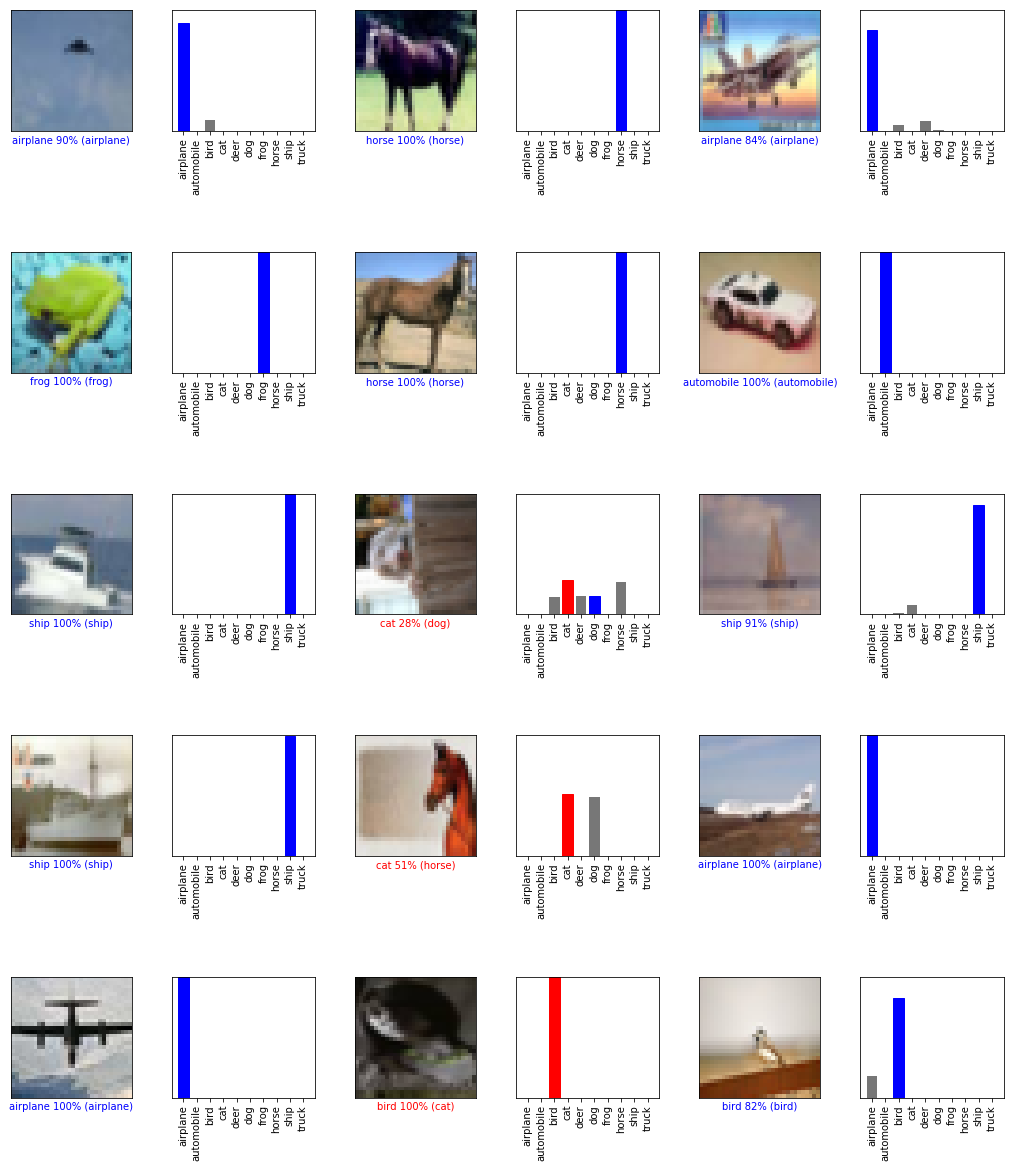

In [0]:
rnd_idx = np.random.randint(1, n_test//batch_size)
img_cnt = 0
for images, labels in test_dataset:
    img_cnt += 1
    if img_cnt != rnd_idx:
        continue
    predictions = model(images, training=False)
    num_rows = 5
    num_cols = 3
    num_images = num_rows*num_cols
    labels = tf.argmax(labels, axis=-1)
    plt.figure(figsize=(3*2*num_cols, 4*num_rows))
    plt.subplots_adjust(hspace=1.0)
    for i in range(num_images):
        plt.subplot(num_rows, 2*num_cols, 2*i+1)
        plot_image(i, predictions.numpy(), labels.numpy(), images.numpy())
        plt.subplot(num_rows, 2*num_cols, 2*i+2)
        plot_value_array(i, predictions.numpy(), labels.numpy())        
    break

# GoogLeNet for Cifar10 Dataset

In [0]:
## Hyperparameters
learning_rate = 0.0005
training_epochs = 20
batch_size = 100
img_size = 224
n_class = 10

In [0]:
## data preprocessing - resize image
def img_resize(images, labels):
  return tf.image.resize(images, (img_size, img_size)), labels

In [0]:
## Dataset 만들기
(train_images, train_labels), (test_images, test_labels) = cifar.load_data()    
    
train_images = train_images.astype(np.float32) / 255.
test_images = test_images.astype(np.float32) / 255.
#train_images = np.expand_dims(train_images, axis=-1)
#test_images = np.expand_dims(test_images, axis=-1)
print(train_images.shape)
print(test_images.shape)
n_train = train_images.shape[0]
n_test = test_images.shape[0]
    
train_labels = to_categorical(train_labels, 10)
test_labels = to_categorical(test_labels, 10) 

(50000, 32, 32, 3)
(10000, 32, 32, 3)


In [0]:
train_dataset = tf.data.Dataset.from_tensor_slices((train_images, train_labels)).shuffle(
                buffer_size=50000).batch(batch_size).map(img_resize).repeat()
test_dataset = tf.data.Dataset.from_tensor_slices((test_images, test_labels)).batch(
                batch_size).map(img_resize).repeat()

In [0]:
## GoogLeNet
from tensorflow.keras.layers import Input, Conv2D, Dense, MaxPool2D, GlobalAveragePooling2D, Concatenate, Dropout

def create_model():
    ## Stem
    inputs = Input(shape=(img_size, img_size, 3))
    net = Conv2D(64, 7, 2, 'SAME', activation='relu')(inputs)
    net = MaxPool2D(3, 2, 'SAME')(net)
    net = Conv2D(64, 1, 1, 'SAME', activation='relu')(net)
    net = Conv2D(192, 3, 1, 'SAME', activation='relu')(net)
    net = MaxPool2D(3, 2, 'SAME')(net)
    ## inception 3a
    b1 = Conv2D(64, 1, 1, 'SAME', activation='relu')(net)
    b2 = Conv2D(96, 1, 1, 'SAME', activation='relu')(net)
    b2 = Conv2D(128, 3, 1, 'SAME', activation='relu')(b2)
    b3 = Conv2D(16, 1, 1, 'SAME', activation='relu')(net)
    b3 = Conv2D(32, 5, 1, 'SAME', activation='relu')(b3)
    b4 = MaxPool2D(3, 1, 'SAME')(net)
    b4 = Conv2D(32, 1, 1, 'SAME', activation='relu')(b4)
    net = Concatenate()([b1, b2, b3, b4])
    ## inception 3b
    b1 = Conv2D(128, 1, 1, 'SAME', activation='relu')(net)
    b2 = Conv2D(128, 1, 1, 'SAME', activation='relu')(net)
    b2 = Conv2D(192, 3, 1, 'SAME', activation='relu')(b2)
    b3 = Conv2D(32, 1, 1, 'SAME', activation='relu')(net)
    b3 = Conv2D(96, 5, 1, 'SAME', activation='relu')(b3)
    b4 = MaxPool2D(3, 1, 'SAME')(net)
    b4 = Conv2D(64, 1, 1, 'SAME', activation='relu')(b4)
    net = Concatenate()([b1, b2, b3, b4])
    ## 
    net = MaxPool2D(3, 2, 'SAME')(net)
    ## inception 4a
    b1 = Conv2D(192, 1, 1, 'SAME', activation='relu')(net)
    b2 = Conv2D(96, 1, 1, 'SAME', activation='relu')(net)
    b2 = Conv2D(208, 3, 1, 'SAME', activation='relu')(b2)
    b3 = Conv2D(16, 1, 1, 'SAME', activation='relu')(net)
    b3 = Conv2D(48, 5, 1, 'SAME', activation='relu')(b3)
    b4 = MaxPool2D(3, 1, 'SAME')(net)
    b4 = Conv2D(64, 1, 1, 'SAME', activation='relu')(b4)
    net = Concatenate()([b1, b2, b3, b4])
    ## inception 4b
    b1 = Conv2D(160, 1, 1, 'SAME', activation='relu')(net)
    b2 = Conv2D(112, 1, 1, 'SAME', activation='relu')(net)
    b2 = Conv2D(224, 3, 1, 'SAME', activation='relu')(b2)
    b3 = Conv2D(24, 1, 1, 'SAME', activation='relu')(net)
    b3 = Conv2D(64, 5, 1, 'SAME', activation='relu')(b3)
    b4 = MaxPool2D(3, 1, 'SAME')(net)
    b4 = Conv2D(64, 1, 1, 'SAME', activation='relu')(b4)
    net = Concatenate()([b1, b2, b3, b4])
    ## inception 4c
    b1 = Conv2D(128, 1, 1, 'SAME', activation='relu')(net)
    b2 = Conv2D(128, 1, 1, 'SAME', activation='relu')(net)
    b2 = Conv2D(256, 3, 1, 'SAME', activation='relu')(b2)
    b3 = Conv2D(24, 1, 1, 'SAME', activation='relu')(net)
    b3 = Conv2D(64, 5, 1, 'SAME', activation='relu')(b3)
    b4 = MaxPool2D(3, 1, 'SAME')(net)
    b4 = Conv2D(64, 1, 1, 'SAME', activation='relu')(b4)
    net = Concatenate()([b1, b2, b3, b4])
    ## inception 4d
    b1 = Conv2D(112, 1, 1, 'SAME', activation='relu')(net)
    b2 = Conv2D(144, 1, 1, 'SAME', activation='relu')(net)
    b2 = Conv2D(288, 3, 1, 'SAME', activation='relu')(b2)
    b3 = Conv2D(32, 1, 1, 'SAME', activation='relu')(net)
    b3 = Conv2D(64, 5, 1, 'SAME', activation='relu')(b3)
    b4 = MaxPool2D(3, 1, 'SAME')(net)
    b4 = Conv2D(64, 1, 1, 'SAME', activation='relu')(b4)
    net = Concatenate()([b1, b2, b3, b4])
    ## inception 4e
    b1 = Conv2D(256, 1, 1, 'SAME', activation='relu')(net)
    b2 = Conv2D(160, 1, 1, 'SAME', activation='relu')(net)
    b2 = Conv2D(320, 3, 1, 'SAME', activation='relu')(b2)
    b3 = Conv2D(32, 1, 1, 'SAME', activation='relu')(net)
    b3 = Conv2D(128, 5, 1, 'SAME', activation='relu')(b3)
    b4 = MaxPool2D(3, 1, 'SAME')(net)
    b4 = Conv2D(128, 1, 1, 'SAME', activation='relu')(b4)
    net = Concatenate()([b1, b2, b3, b4])
    ##
    net = MaxPool2D(3, 2, 'SAME')(net)
    ## inception 5a
    b1 = Conv2D(256, 1, 1, 'SAME', activation='relu')(net)
    b2 = Conv2D(160, 1, 1, 'SAME', activation='relu')(net)
    b2 = Conv2D(320, 3, 1, 'SAME', activation='relu')(b2)
    b3 = Conv2D(32, 1, 1, 'SAME', activation='relu')(net)
    b3 = Conv2D(128, 5, 1, 'SAME', activation='relu')(b3)
    b4 = MaxPool2D(3, 1, 'SAME')(net)
    b4 = Conv2D(128, 1, 1, 'SAME', activation='relu')(b4)
    net = Concatenate()([b1, b2, b3, b4])
    ## inception 5b
    b1 = Conv2D(384, 1, 1, 'SAME', activation='relu')(net)
    b2 = Conv2D(192, 1, 1, 'SAME', activation='relu')(net)
    b2 = Conv2D(384, 3, 1, 'SAME', activation='relu')(b2)
    b3 = Conv2D(48, 1, 1, 'SAME', activation='relu')(net)
    b3 = Conv2D(128, 5, 1, 'SAME', activation='relu')(b3)
    b4 = MaxPool2D(3, 1, 'SAME')(net)
    b4 = Conv2D(128, 1, 1, 'SAME', activation='relu')(b4)
    net = Concatenate()([b1, b2, b3, b4])
    ## global average pooling
    net = GlobalAveragePooling2D()(net)
    net = Dropout(0.4)(net)
    net = Dense(10, activation='softmax')(net)
    
    return keras.Model(inputs=inputs, outputs=net)

In [0]:
model = create_model()
model.summary()

Model: "model_3"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_4 (InputLayer)            [(None, 224, 224, 3) 0                                            
__________________________________________________________________________________________________
conv2d_174 (Conv2D)             (None, 112, 112, 64) 9472        input_4[0][0]                    
__________________________________________________________________________________________________
max_pooling2d_42 (MaxPooling2D) (None, 56, 56, 64)   0           conv2d_174[0][0]                 
__________________________________________________________________________________________________
conv2d_175 (Conv2D)             (None, 56, 56, 64)   4160        max_pooling2d_42[0][0]           
____________________________________________________________________________________________

In [0]:
## Model Compile
model.compile(optimizers=keras.optimizers.Adam(learning_rate),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [0]:
steps_per_epoch = n_train/batch_size
validation_steps = n_test/batch_size

model.evaluate(test_dataset, steps=validation_steps)

100/100 [==============================] - 29s 294ms/step - loss: 2.3026 - accuracy: 0.0962


[2.302637164592743, 0.0962]

In [0]:
## Training
history = model.fit(train_dataset, epochs=training_epochs, steps_per_epoch=steps_per_epoch, 
                    validation_data=test_dataset, validation_steps=validation_steps)

Train for 500.0 steps, validate for 100.0 steps
Epoch 1/30
500/500 [==============================] - 432s 863ms/step - loss: 2.3984 - accuracy: 0.1095 - val_loss: 2.2425 - val_accuracy: 0.1792
Epoch 2/30
500/500 [==============================] - 423s 847ms/step - loss: 2.1241 - accuracy: 0.2140 - val_loss: 1.7355 - val_accuracy: 0.3400
Epoch 3/30
500/500 [==============================] - 425s 850ms/step - loss: 1.7123 - accuracy: 0.3696 - val_loss: 1.5136 - val_accuracy: 0.4362
Epoch 4/30
500/500 [==============================] - 425s 849ms/step - loss: 1.4796 - accuracy: 0.4594 - val_loss: 1.3043 - val_accuracy: 0.5196
Epoch 5/30
500/500 [==============================] - 424s 849ms/step - loss: 1.2958 - accuracy: 0.5330 - val_loss: 1.5128 - val_accuracy: 0.4460
Epoch 6/30
500/500 [==============================] - 424s 848ms/step - loss: 1.1367 - accuracy: 0.5974 - val_loss: 1.0700 - val_accuracy: 0.6279
Epoch 7/30
500/500 [==============================] - 424s 848ms/step - loss

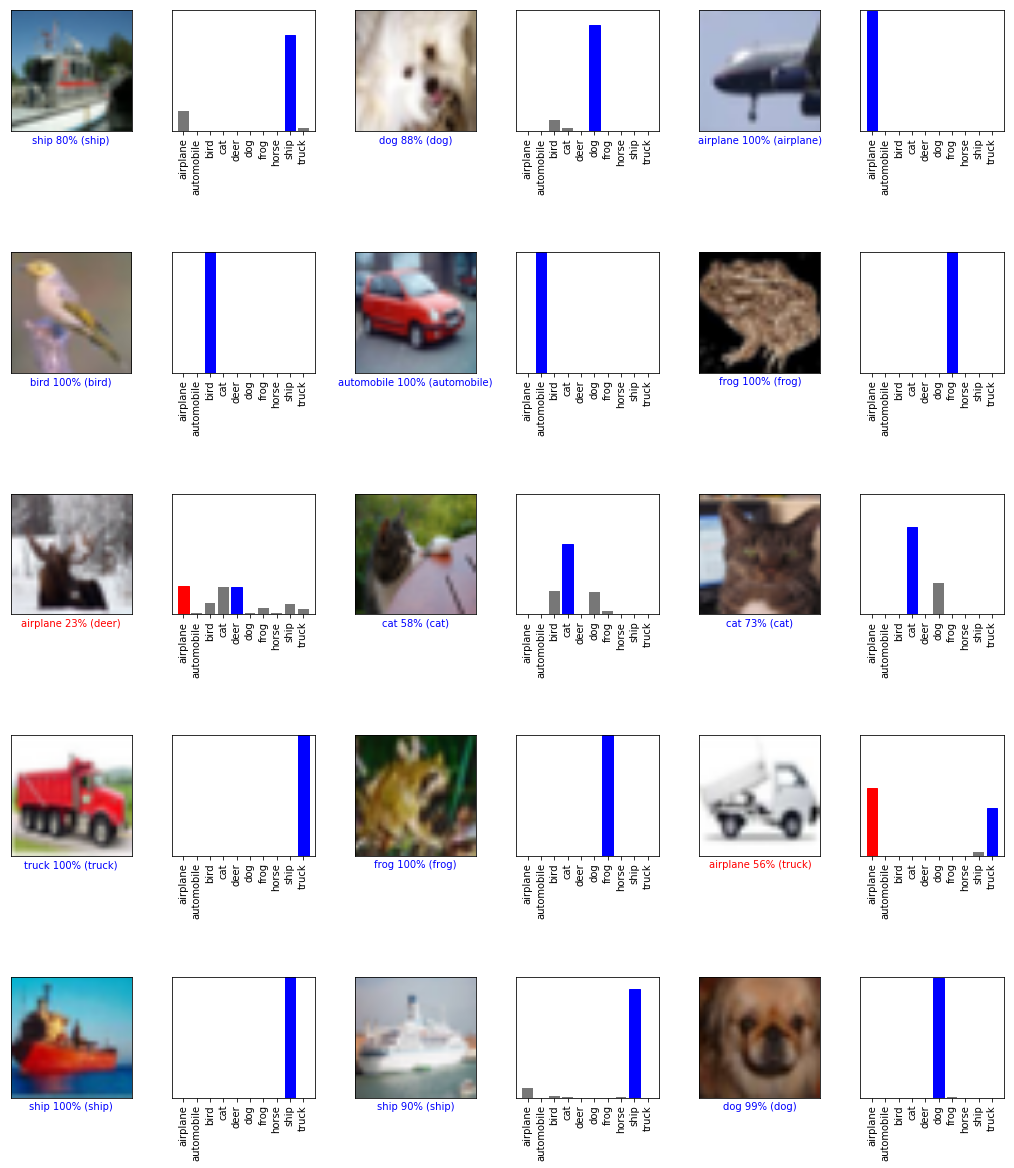

In [0]:
rnd_idx = np.random.randint(1, n_test//batch_size)
img_cnt = 0
for images, labels in test_dataset:
    img_cnt += 1
    if img_cnt != rnd_idx:
        continue
    predictions = model(images, training=False)
    num_rows = 5
    num_cols = 3
    num_images = num_rows*num_cols
    labels = tf.argmax(labels, axis=-1)
    plt.figure(figsize=(3*2*num_cols, 4*num_rows))
    plt.subplots_adjust(hspace=1.0)
    for i in range(num_images):
        plt.subplot(num_rows, 2*num_cols, 2*i+1)
        plot_image(i, predictions.numpy(), labels.numpy(), images.numpy())
        plt.subplot(num_rows, 2*num_cols, 2*i+2)
        plot_value_array(i, predictions.numpy(), labels.numpy())        
    break

# MobileNet for Cifar10 Dataset

In [0]:
## HyperParameters
learning_rate = 0.001
training_epochs = 20
batch_size = 100
img_size = 224
n_class = 10

In [0]:
## Data 준비

## MNIST Dataset #########################################################
#mnist = keras.datasets.mnist
#class_names = ['0', '1', '2', '3', '4', '5', '6', '7', '8', '9']
##########################################################################

## Fashion MNIST Dataset #################################################
#mnist = keras.datasets.fashion_mnist
#class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']
##########################################################################

## Cifar10 Dataset #########################################################
cifar = keras.datasets.cifar10
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']
############################################################################

In [0]:
## data preprocessing - resize image
def img_resize(images, labels):
  return tf.image.resize(images, (img_size, img_size)), labels

In [63]:
## Dataset 만들기
(train_images, train_labels), (test_images, test_labels) = cifar.load_data()    
    
train_images = train_images.astype(np.float32) / 255.
test_images = test_images.astype(np.float32) / 255.
#train_images = np.expand_dims(train_images, axis=-1)
#test_images = np.expand_dims(test_images, axis=-1)
print(train_images.shape)
print(test_images.shape)
n_train = train_images.shape[0]
n_test = test_images.shape[0]
    
train_labels = to_categorical(train_labels, 10)
test_labels = to_categorical(test_labels, 10) 

(50000, 32, 32, 3)
(10000, 32, 32, 3)


In [0]:
train_dataset = tf.data.Dataset.from_tensor_slices((train_images, train_labels)).shuffle(
                buffer_size=50000).batch(batch_size).map(img_resize).repeat()
test_dataset = tf.data.Dataset.from_tensor_slices((test_images, test_labels)).batch(
                batch_size).map(img_resize).repeat()

In [0]:
## MobileNet
from tensorflow.keras.layers import Conv2D, Dense, ReLU, Softmax, BatchNormalization, DepthwiseConv2D, GlobalAveragePooling2D

def create_model():
    model = keras.Sequential()
    model.add(Conv2D(filters=32, kernel_size=3, strides=2, padding='SAME', 
                     use_bias=False, input_shape=(img_size, img_size, 3)))
    model.add(BatchNormalization())
    model.add(ReLU())
    
    model.add(DepthwiseConv2D(kernel_size=3, strides=1, padding='SAME', use_bias=False))
    model.add(BatchNormalization())
    model.add(ReLU())
    model.add(Conv2D(filters=64, kernel_size=1, use_bias=False))
    model.add(BatchNormalization())
    model.add(ReLU())
    
    model.add(DepthwiseConv2D(kernel_size=3, strides=2, padding='SAME', use_bias=False))
    model.add(BatchNormalization())
    model.add(ReLU())
    model.add(Conv2D(filters=128, kernel_size=1, use_bias=False))
    model.add(BatchNormalization())
    model.add(ReLU())
    
    model.add(DepthwiseConv2D(kernel_size=3, strides=1, padding='SAME', use_bias=False))
    model.add(BatchNormalization())
    model.add(ReLU())
    model.add(Conv2D(filters=128, kernel_size=1, use_bias=False))
    model.add(BatchNormalization())
    model.add(ReLU())
    
    model.add(DepthwiseConv2D(kernel_size=3, strides=2, padding='SAME', use_bias=False))
    model.add(BatchNormalization())
    model.add(ReLU())
    model.add(Conv2D(filters=256, kernel_size=1, use_bias=False))
    model.add(BatchNormalization())
    model.add(ReLU())
    
    model.add(DepthwiseConv2D(kernel_size=3, strides=1, padding='SAME', use_bias=False))
    model.add(BatchNormalization())
    model.add(ReLU())
    model.add(Conv2D(filters=256, kernel_size=1, use_bias=False))
    model.add(BatchNormalization())
    model.add(ReLU())
    
    model.add(DepthwiseConv2D(kernel_size=3, strides=2, padding='SAME', use_bias=False))
    model.add(BatchNormalization())
    model.add(ReLU())
    model.add(Conv2D(filters=512, kernel_size=1, use_bias=False))
    model.add(BatchNormalization())
    model.add(ReLU())
    
    model.add(DepthwiseConv2D(kernel_size=3, strides=1, padding='SAME', use_bias=False))
    model.add(BatchNormalization())
    model.add(ReLU())
    model.add(Conv2D(filters=512, kernel_size=1, use_bias=False))
    model.add(BatchNormalization())
    model.add(ReLU())
    
    model.add(DepthwiseConv2D(kernel_size=3, strides=1, padding='SAME', use_bias=False))
    model.add(BatchNormalization())
    model.add(ReLU())
    model.add(Conv2D(filters=512, kernel_size=1, use_bias=False))
    model.add(BatchNormalization())
    model.add(ReLU())
    
    model.add(DepthwiseConv2D(kernel_size=3, strides=1, padding='SAME', use_bias=False))
    model.add(BatchNormalization())
    model.add(ReLU())
    model.add(Conv2D(filters=512, kernel_size=1, use_bias=False))
    model.add(BatchNormalization())
    model.add(ReLU())
    
    model.add(DepthwiseConv2D(kernel_size=3, strides=1, padding='SAME', use_bias=False))
    model.add(BatchNormalization())
    model.add(ReLU())
    model.add(Conv2D(filters=512, kernel_size=1, use_bias=False))
    model.add(BatchNormalization())
    model.add(ReLU())
    
    model.add(DepthwiseConv2D(kernel_size=3, strides=1, padding='SAME', use_bias=False))
    model.add(BatchNormalization())
    model.add(ReLU())
    model.add(Conv2D(filters=512, kernel_size=1, use_bias=False))
    model.add(BatchNormalization())
    model.add(ReLU())
    
    model.add(DepthwiseConv2D(kernel_size=3, strides=2, padding='SAME', use_bias=False))
    model.add(BatchNormalization())
    model.add(ReLU())
    model.add(Conv2D(filters=1024, kernel_size=1, use_bias=False))
    model.add(BatchNormalization())
    model.add(ReLU())
    
    model.add(DepthwiseConv2D(kernel_size=3, strides=1, padding='SAME', use_bias=False))
    model.add(BatchNormalization())
    model.add(ReLU())
    model.add(Conv2D(filters=1024, kernel_size=1, use_bias=False))
    model.add(BatchNormalization())
    model.add(ReLU())
    
    model.add(GlobalAveragePooling2D())
    model.add(Dense(units=128))
    model.add(BatchNormalization())
    model.add(ReLU())
    model.add(Dense(units=10))
    model.add(BatchNormalization())
    model.add(Softmax())
    return model

In [66]:
model = create_model()
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 112, 112, 32)      864       
_________________________________________________________________
batch_normalization_4 (Batch (None, 112, 112, 32)      128       
_________________________________________________________________
re_lu_2 (ReLU)               (None, 112, 112, 32)      0         
_________________________________________________________________
depthwise_conv2d (DepthwiseC (None, 112, 112, 32)      288       
_________________________________________________________________
batch_normalization_5 (Batch (None, 112, 112, 32)      128       
_________________________________________________________________
re_lu_3 (ReLU)               (None, 112, 112, 32)      0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 112, 112, 64)     

In [0]:
## Model Compile
model.compile(optimizers=keras.optimizers.Adam(learning_rate),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [68]:
steps_per_epoch = n_train/batch_size
validation_steps = n_test/batch_size

model.evaluate(test_dataset, steps=validation_steps)

100/100 [==============================] - 22s 219ms/step - loss: 2.3026 - accuracy: 0.1000


[2.3025851249694824, 0.1]

In [69]:
## Training
history = model.fit(train_dataset, epochs=training_epochs, steps_per_epoch=steps_per_epoch, 
                    validation_data=test_dataset, validation_steps=validation_steps)

Train for 500.0 steps, validate for 100.0 steps
Epoch 1/20
500/500 [==============================] - 500s 1000ms/step - loss: 1.4232 - accuracy: 0.5048 - val_loss: 3.2647 - val_accuracy: 0.1000
Epoch 2/20
500/500 [==============================] - 496s 991ms/step - loss: 0.9225 - accuracy: 0.6972 - val_loss: 1.6937 - val_accuracy: 0.4639
Epoch 3/20
500/500 [==============================] - 494s 989ms/step - loss: 0.6830 - accuracy: 0.7795 - val_loss: 1.0293 - val_accuracy: 0.6780
Epoch 4/20
500/500 [==============================] - 496s 992ms/step - loss: 0.5375 - accuracy: 0.8253 - val_loss: 1.1879 - val_accuracy: 0.6368
Epoch 5/20
324/500 [==================>...........] - ETA: 2:45 - loss: 0.4403 - accuracy: 0.8592

ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.



Traceback (most recent call last):
  File "/usr/local/lib/python3.6/dist-packages/IPython/core/interactiveshell.py", line 2882, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "<ipython-input-69-e8bc8c923d6b>", line 2, in <module>
    validation_data=test_dataset, validation_steps=validation_steps)
  File "/usr/local/lib/python3.6/dist-packages/tensorflow_core/python/keras/engine/training.py", line 728, in fit
    use_multiprocessing=use_multiprocessing)
  File "/usr/local/lib/python3.6/dist-packages/tensorflow_core/python/keras/engine/training_v2.py", line 324, in fit
    total_epochs=epochs)
  File "/usr/local/lib/python3.6/dist-packages/tensorflow_core/python/keras/engine/training_v2.py", line 123, in run_one_epoch
    batch_outs = execution_function(iterator)
  File "/usr/local/lib/python3.6/dist-packages/tensorflow_core/python/keras/engine/training_v2_utils.py", line 86, in execution_function
    distributed_function(input_fn))
  File "/usr/local/lib/pytho

KeyboardInterrupt: ignored

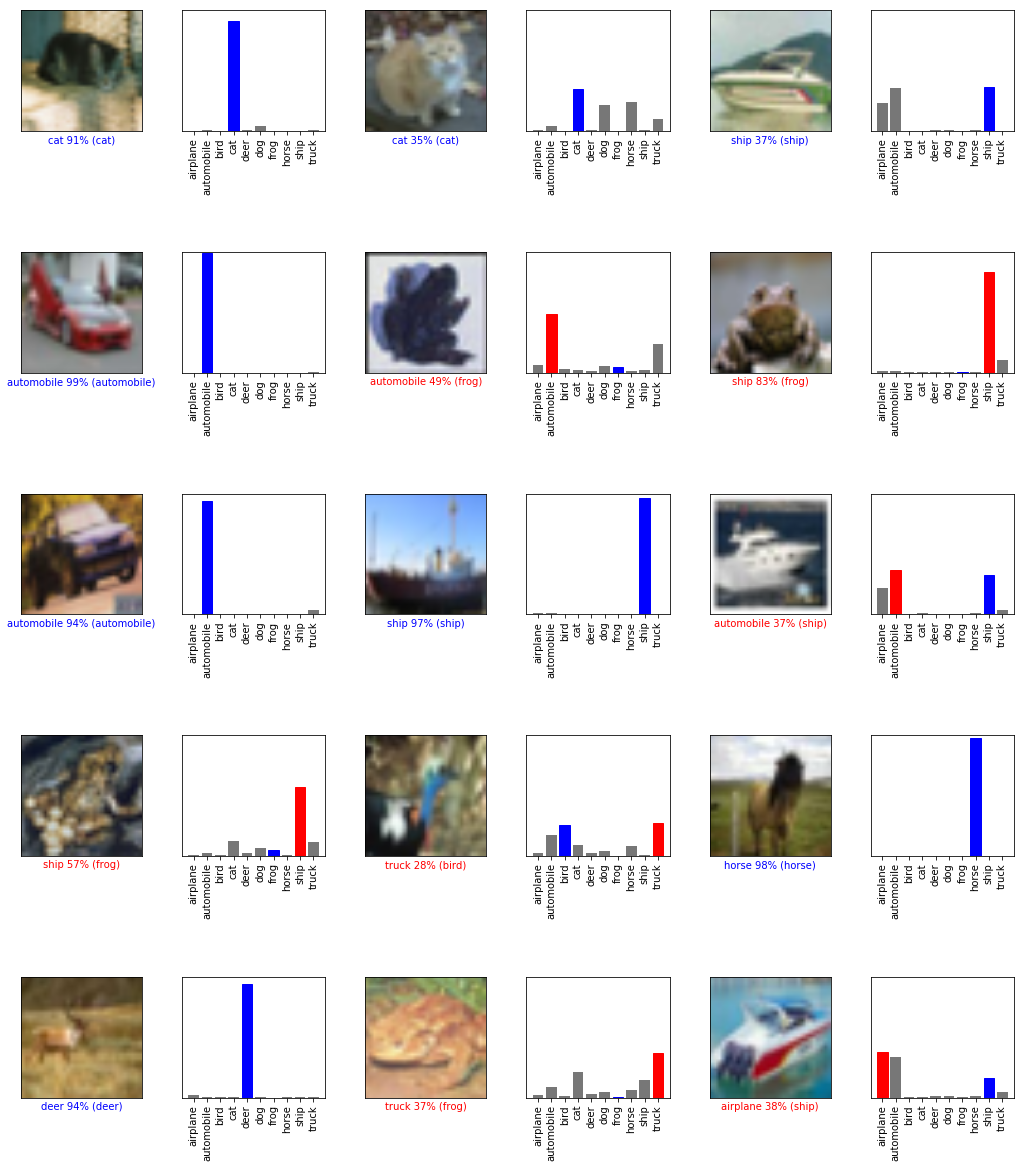

In [70]:
rnd_idx = np.random.randint(1, n_test//batch_size)
img_cnt = 0
for images, labels in test_dataset:
    img_cnt += 1
    if img_cnt != rnd_idx:
        continue
    predictions = model(images, training=False)
    num_rows = 5
    num_cols = 3
    num_images = num_rows*num_cols
    labels = tf.argmax(labels, axis=-1)
    plt.figure(figsize=(3*2*num_cols, 4*num_rows))
    plt.subplots_adjust(hspace=1.0)
    for i in range(num_images):
        plt.subplot(num_rows, 2*num_cols, 2*i+1)
        plot_image(i, predictions.numpy(), labels.numpy(), images.numpy())
        plt.subplot(num_rows, 2*num_cols, 2*i+2)
        plot_value_array(i, predictions.numpy(), labels.numpy())        
    break

# Inference Only by Pretrained MobileNet

In [8]:
## Google drive mount
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
from tensorflow.keras.applications.mobilenet import MobileNet, preprocess_input, decode_predictions

In [0]:
img_size = 224

In [6]:
## Pretrained MobileNet 가져오기
conv_base = MobileNet(weights='imagenet', include_top=True, input_shape=(img_size, img_size, 3))

17227776/17225924 [==============================] - 0s 0us/step


In [7]:
conv_base.summary()

Model: "mobilenet_1.00_224"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
conv1_pad (ZeroPadding2D)    (None, 225, 225, 3)       0         
_________________________________________________________________
conv1 (Conv2D)               (None, 112, 112, 32)      864       
_________________________________________________________________
conv1_bn (BatchNormalization (None, 112, 112, 32)      128       
_________________________________________________________________
conv1_relu (ReLU)            (None, 112, 112, 32)      0         
_________________________________________________________________
conv_dw_1 (DepthwiseConv2D)  (None, 112, 112, 32)      288       
_________________________________________________________________
conv_dw_1_bn (BatchNormaliza (None, 112, 112, 32

In [71]:
## Google Drive로 이동
cd '/content/drive/My Drive/new_drug_adv_tf'

ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.



Traceback (most recent call last):
  File "/usr/local/lib/python3.6/dist-packages/IPython/core/interactiveshell.py", line 2882, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "<ipython-input-71-6b943dc1157b>", line 1, in <module>
    get_ipython().magic("cd '/content/drive/My Drive/new_drug_adv_tf'")
  File "/usr/local/lib/python3.6/dist-packages/IPython/core/interactiveshell.py", line 2160, in magic
    return self.run_line_magic(magic_name, magic_arg_s)
  File "/usr/local/lib/python3.6/dist-packages/IPython/core/interactiveshell.py", line 2081, in run_line_magic
    result = fn(*args,**kwargs)
  File "</usr/local/lib/python3.6/dist-packages/decorator.py:decorator-gen-91>", line 2, in cd
  File "/usr/local/lib/python3.6/dist-packages/IPython/core/magic.py", line 188, in <lambda>
    call = lambda f, *a, **k: f(*a, **k)
  File "/usr/local/lib/python3.6/dist-packages/IPython/core/magics/osm.py", line 288, in cd
    oldcwd = py3compat.getcwd()
OSError: [Errno 10

OSError: ignored

In [29]:
## Test image 열기
from PIL import Image
test_img = Image.open('data/mada.jpg')
test_img = test_img.resize((img_size, img_size))
test_img = np.asarray(test_img)
test_img = np.reshape(test_img, (-1, img_size, img_size, 3))
test_img.shape

(1, 224, 224, 3)

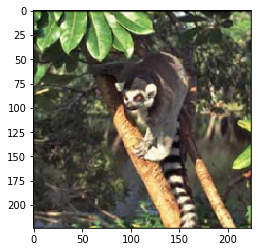

In [30]:
plt.imshow(test_img[0])
plt.show()

In [31]:
## MobileNet으로 inference하기
prediction = conv_base.predict(preprocess_input(test_img))
print(test_img.shape)
print(preprocess_input(test_img).shape)

(1, 224, 224, 3)
(1, 224, 224, 3)


In [14]:
## 예측결과확인
prediction

array([[2.15571649e-09, 8.73748685e-10, 1.10261533e-08, 7.78811238e-09,
        1.71894599e-09, 8.22220443e-08, 5.62223545e-10, 5.82029047e-09,
        1.79762409e-08, 5.35860579e-07, 7.58150023e-08, 9.87271487e-10,
        2.21520469e-09, 2.57775801e-09, 9.99133998e-10, 7.28573752e-07,
        3.14779555e-07, 1.82702126e-06, 5.18456375e-07, 2.06080557e-08,
        1.40940859e-08, 2.79763356e-07, 2.51976555e-08, 1.50764208e-07,
        5.34967785e-06, 8.24581207e-07, 2.15046134e-06, 1.06077334e-08,
        3.80452377e-07, 1.84041511e-08, 7.37252526e-09, 6.59314310e-08,
        1.61145533e-06, 1.15017833e-07, 1.23978827e-09, 4.77164406e-08,
        9.92353790e-08, 6.14881515e-08, 4.77794129e-06, 2.72947432e-07,
        2.55016293e-08, 4.66899246e-06, 1.92663819e-07, 1.06640502e-04,
        2.86966412e-07, 3.03897636e-08, 6.88679336e-08, 1.07617752e-05,
        6.35035562e-08, 1.15234123e-07, 4.96651298e-09, 9.80010441e-07,
        8.61979606e-06, 1.53619260e-06, 5.29324052e-06, 2.242774

In [15]:
decode_predictions(prediction, top=5)

40960/35363 [==================================] - 0s 0us/step


[[('n02500267', 'indri', 0.7936633),
  ('n02493509', 'titi', 0.17488891),
  ('n02483362', 'gibbon', 0.014080346),
  ('n02497673', 'Madagascar_cat', 0.009913612),
  ('n02494079', 'squirrel_monkey', 0.0021979578)]]

# Fine-tuning Pretrained MobileNet

In [0]:
from tensorflow.keras.layers import ReLU,Dense, BatchNormalization, Softmax, GlobalAveragePooling2D

In [0]:
from tensorflow.keras.applications.mobilenet import MobileNet, preprocess_input, decode_predictions

In [0]:
## HyperParameters
learning_rate = 0.0001
training_epochs = 5
batch_size = 100
img_size = 224
n_class = 10

In [0]:
## Data 준비

## MNIST Dataset #########################################################
#mnist = keras.datasets.mnist
#class_names = ['0', '1', '2', '3', '4', '5', '6', '7', '8', '9']
##########################################################################

## Fashion MNIST Dataset #################################################
#mnist = keras.datasets.fashion_mnist
#class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']
##########################################################################

## Cifar10 Dataset #########################################################
cifar = keras.datasets.cifar10
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']
############################################################################

In [0]:
## data preprocessing - resize image
def img_resize(images, labels):
  return tf.image.resize(images, (img_size, img_size)), labels

In [46]:
## Dataset 만들기
(train_images, train_labels), (test_images, test_labels) = cifar.load_data()    
    
train_images = train_images.astype(np.float32) / 255.
test_images = test_images.astype(np.float32) / 255.
#train_images = np.expand_dims(train_images, axis=-1)
#test_images = np.expand_dims(test_images, axis=-1)
print(train_images.shape)
print(test_images.shape)
n_train = train_images.shape[0]
n_test = test_images.shape[0]
    
train_labels = to_categorical(train_labels, 10)
test_labels = to_categorical(test_labels, 10) 

(50000, 32, 32, 3)
(10000, 32, 32, 3)


In [0]:
train_dataset = tf.data.Dataset.from_tensor_slices((train_images, train_labels)).shuffle(
                buffer_size=50000).batch(batch_size).map(img_resize).repeat()
test_dataset = tf.data.Dataset.from_tensor_slices((test_images, test_labels)).batch(
                batch_size).map(img_resize).repeat()

In [48]:
## Load Pretrained Model
conv_base = MobileNet(weights='imagenet', include_top=False,
                     input_shape=(img_size, img_size, 3))
conv_base.summary()

Model: "mobilenet_1.00_224"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_6 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
conv1_pad (ZeroPadding2D)    (None, 225, 225, 3)       0         
_________________________________________________________________
conv1 (Conv2D)               (None, 112, 112, 32)      864       
_________________________________________________________________
conv1_bn (BatchNormalization (None, 112, 112, 32)      128       
_________________________________________________________________
conv1_relu (ReLU)            (None, 112, 112, 32)      0         
_________________________________________________________________
conv_dw_1 (DepthwiseConv2D)  (None, 112, 112, 32)      288       
_________________________________________________________________
conv_dw_1_bn (BatchNormaliza (None, 112, 112, 32

In [0]:
## Model 만들기
def create_model():
    model = keras.Sequential()
    model.add(conv_base)
    model.add(GlobalAveragePooling2D())
    model.add(Dense(128))
    model.add(BatchNormalization())
    model.add(ReLU())
    model.add(Dense(10))
    model.add(BatchNormalization())
    model.add(Softmax())
    return model

In [50]:
model = create_model()
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
mobilenet_1.00_224 (Model)   (None, 7, 7, 1024)        3228864   
_________________________________________________________________
global_average_pooling2d_3 ( (None, 1024)              0         
_________________________________________________________________
dense_2 (Dense)              (None, 128)               131200    
_________________________________________________________________
batch_normalization_2 (Batch (None, 128)               512       
_________________________________________________________________
re_lu_1 (ReLU)               (None, 128)               0         
_________________________________________________________________
dense_3 (Dense)              (None, 10)                1290      
_________________________________________________________________
batch_normalization_3 (Batch (None, 10)               

In [0]:
## Model Compile
model.compile(optimizers=keras.optimizers.Adam(learning_rate),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [52]:
steps_per_epoch = n_train/batch_size
validation_steps = n_test/batch_size

model.evaluate(test_dataset, steps=validation_steps)

100/100 [==============================] - 27s 265ms/step - loss: 2.8750 - accuracy: 0.1149


[2.874970736503601, 0.1149]

In [53]:
## Training
history = model.fit(train_dataset, epochs=training_epochs, steps_per_epoch=steps_per_epoch, 
                    validation_data=test_dataset, validation_steps=validation_steps)

Train for 500.0 steps, validate for 100.0 steps
Epoch 1/5
500/500 [==============================] - 520s 1s/step - loss: 0.5517 - accuracy: 0.8638 - val_loss: 0.8651 - val_accuracy: 0.7944
Epoch 2/5
500/500 [==============================] - 516s 1s/step - loss: 0.2955 - accuracy: 0.9235 - val_loss: 0.5424 - val_accuracy: 0.8284
Epoch 3/5
500/500 [==============================] - 512s 1s/step - loss: 0.1973 - accuracy: 0.9470 - val_loss: 0.4709 - val_accuracy: 0.8571
Epoch 4/5
500/500 [==============================] - 511s 1s/step - loss: 0.1428 - accuracy: 0.9585 - val_loss: 0.3035 - val_accuracy: 0.9057
Epoch 5/5
500/500 [==============================] - 516s 1s/step - loss: 0.1114 - accuracy: 0.9677 - val_loss: 0.3865 - val_accuracy: 0.8815


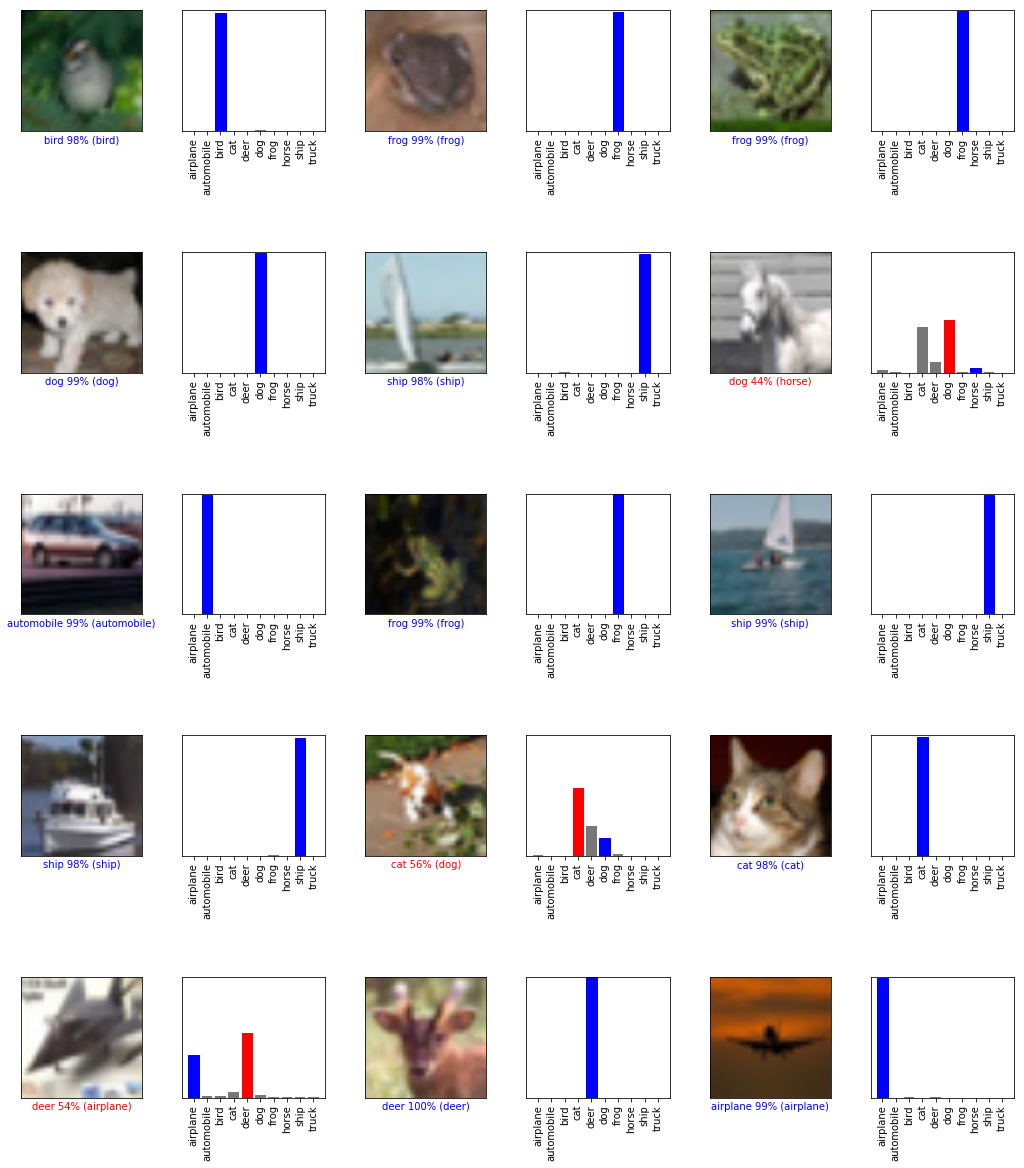

In [58]:
rnd_idx = np.random.randint(1, n_test//batch_size)
img_cnt = 0
for images, labels in test_dataset:
    img_cnt += 1
    if img_cnt != rnd_idx:
        continue
    predictions = model(images, training=False)
    num_rows = 5
    num_cols = 3
    num_images = num_rows*num_cols
    labels = tf.argmax(labels, axis=-1)
    plt.figure(figsize=(3*2*num_cols, 4*num_rows))
    plt.subplots_adjust(hspace=1.0)
    for i in range(num_images):
        plt.subplot(num_rows, 2*num_cols, 2*i+1)
        plot_image(i, predictions.numpy(), labels.numpy(), images.numpy())
        plt.subplot(num_rows, 2*num_cols, 2*i+2)
        plot_value_array(i, predictions.numpy(), labels.numpy())        
    break